In [1]:
import pandas as pd
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.head()



,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
data.tail()


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
import matplotlib.pyplot as plt
import numpy as np
y=data.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)
X=data.iloc[0:100,[0,2]].values
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:149,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.02):
    #setup marker generator and color map
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z=z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    #plot class samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


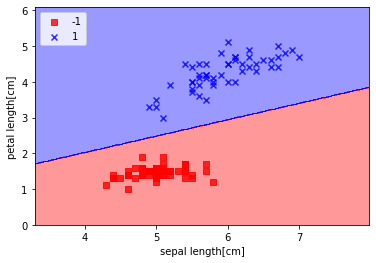

In [5]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(eta0=0.1,max_iter=10)
ppn.fit(X,y)
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='upper left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


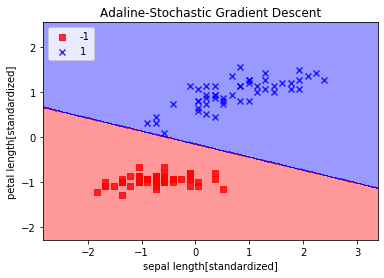

In [6]:
from sklearn.linear_model import SGDClassifier
X_std=np.copy(X)
X_std[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()
ada=SGDClassifier(max_iter=15,eta0=0.01,random_state=1)
ada.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada)
plt.title('Adaline-Stochastic Gradient Descent')
plt.xlabel('sepal length[standardized]')
plt.ylabel('petal length[standardized]')
plt.legend(loc='upper left')
plt.show()

In [7]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)


In [10]:
ppn=Perceptron(max_iter=100,eta0=0.001,random_state=0)
ppn.fit(X_train_std,y_train)
y_pred=ppn.predict(X_test_std)
print('Misclassified samples:%d'%(y_test!=y_pred).sum())

Misclassified samples:3


In [11]:
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))

Accuracy:0.90


In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X,y,classifier,resolution=0.02,text_idx=None):
    #setup marker generator and color map
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z=z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    #plot class samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl) 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


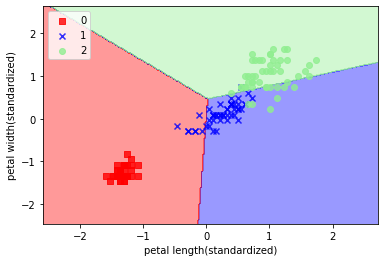

In [13]:
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn)
plt.xlabel('petal length(standardized)')
plt.ylabel('petal width(standardized)')
plt.legend(loc='upper left')
plt.show()


/home/sastri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sastri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB o

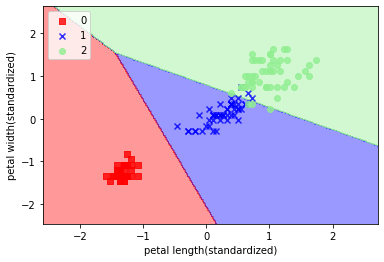

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1000,random_state=0)
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=lr)
plt.xlabel('petal length(standardized)')
plt.ylabel('petal width(standardized)')
plt.legend(loc='upper left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


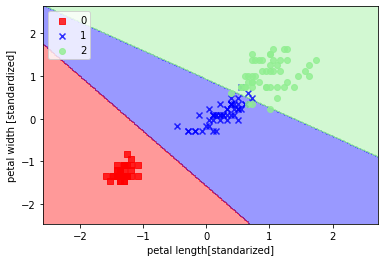

In [15]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm)
plt.xlabel('petal length[standarized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


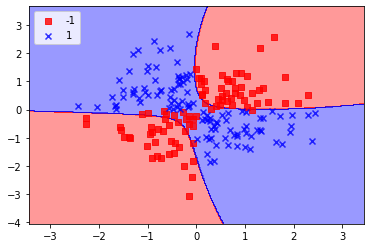

In [16]:
import random
X_xor=np.random.randn(200,2)
y_xor=np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
y_xor=np.where(y_xor,1,-1)
svm=SVC(kernel='rbf',random_state=0,gamma=0.10,C=10.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc='upper left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


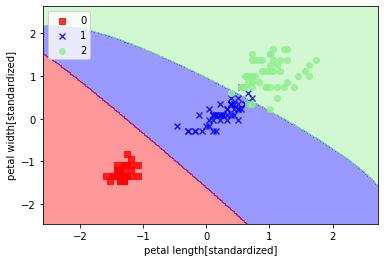

In [17]:
svm=SVC(kernel='rbf',random_state=0,gamma=0.2,C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm)
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc='upper left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


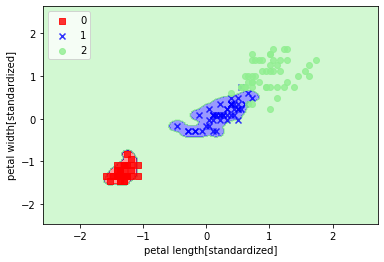

In [18]:
svm=SVC(kernel='rbf',random_state=0,gamma=100,C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm)
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc='upper left')
plt.show()

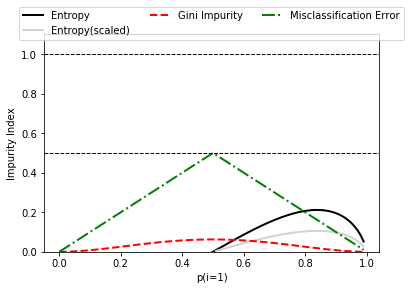

In [19]:
def gini(p):
    return(p)*(1-(p))*(1-p)*(1-(1-p))
def entropy(p):
    return p*np.log2(p)-(1-p)*np.log2(1-p)
def error(p):
    return 1-np.max([p,1-p])
x=np.arange(0.0,1.0,0.01)
ent=[entropy(p) if p!=0 else None for p in x]
sc_ent=[e*0.5 if e else None for e in ent]
err=[error(i) for i in x]
fig=plt.figure()
ax=plt.subplot(111)
for i,lab,ls,c, in zip([ent,sc_ent,gini(x),err],['Entropy','Entropy(scaled)','Gini Impurity','Misclassification Error'],['-','-','--','-.'],['black','lightgray','red','green','cyan']):
    line=ax.plot(x,i,label=lab,linestyle=ls,lw=2,color=c)
ax.legend(loc='upper center',bbox_to_anchor=(0.5,1.15),ncol=3,fancybox=True,shadow=False)
ax.axhline(y=0.5,linewidth=1,color='k',linestyle='--')
ax.axhline(y=1.0,linewidth=1,color='k',linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


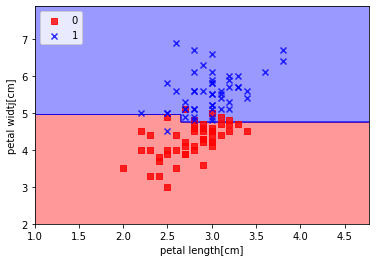

In [46]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
tree.fit(X_train,y_train)
X_combined=np.vstack((X_train,X_test))
y_combined=np.hstack((y_train,y_test))
plot_decision_regions(X_combined,y_combined,classifier=tree)
plt.xlabel('petal length[cm]')
plt.ylabel('petal widtj[cm]')
plt.legend(loc='upper left')
plt.show()

In [47]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',feature_names=['petal length','petal width'])


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


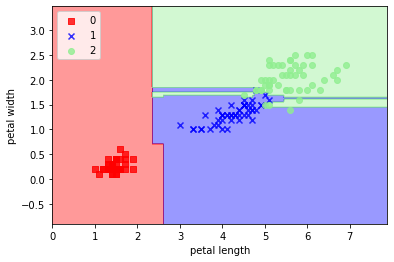

In [22]:
from sklearn.ensemble import RandomForestClassifier
rnd=RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=1,n_jobs=2)
rnd.fit(X_train,y_train)
plot_decision_regions(X_combined,y_combined,classifier=rnd)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


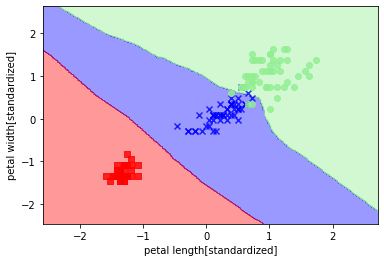

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=knn)
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.show()

In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
iris=datasets.load_iris()
X,y=iris.data[50:,[1,2]],iris.target[50:]
le=LabelEncoder()
y=le.fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=1)
from sklearn.model_selection import cross_val_score
 
from sklearn.pipeline import Pipeline
import numpy as np
clf1=LogisticRegression(penalty='l2',C=0.01,random_state=0)
clf2=DecisionTreeClassifier(max_depth=1,criterion='entropy',random_state=1)
clf3=KNeighborsClassifier(n_neighbors=1,p=2,metric='minkowski')
pipe1=Pipeline([['sc',StandardScaler()],['clf',clf1]])
pipe3=Pipeline([['sc',StandardScaler()],['clf',clf3]])
clf_labels=['Logistic Regression','Decision Tree','KNN']
print('10-fold cross validation:]:\n')
for clf,label in zip([pipe1,clf2,pipe3],clf_labels):
    scores=cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,scoring='roc_auc')
    print('ROC AUC:%0.2f(+/- %0.2f)[%s]'%(scores.mean(),scores.std(),label))

/home/sastri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sastri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sastri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sastri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sastri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

10-fold cross validation:]:

ROC AUC:0.92(+/- 0.20)[Logistic Regression]
ROC AUC:0.92(+/- 0.15)[Decision Tree]
ROC AUC:0.93(+/- 0.10)[KNN]


/home/sastri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sastri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
from sklearn.ensemble import VotingClassifier
mv_clf=VotingClassifier([pipe1,clf2,pipe3])
clf_labels+=['Majority Voting']
all_clf=[pipe1,clf2,pipe3,mv_clf]
for clf,label in zip(all_clf,clf_labels):
    scores=cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,scoring='roc_auc')
    print('Accuracy:%0.2f(+/-%0.2f)[%s]'%(scores.mean(),scores.std(),label))

Accuracy:0.92(+/-0.20)[Logistic Regression]
Accuracy:0.92(+/-0.15)[Decision Tree]
Accuracy:0.93(+/-0.10)[KNN]


/home/sastri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sastri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sastri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sastri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sastri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

TypeError: zip argument #2 must support iteration

In [1]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors=['black','orange','blue','green']
linestyle=[':','--','-.','-']

for clf,label,clr,ls in zip(all_clf,clf_labels,colors,linestyle):
    #assuming the label of the positive class is 1
    y_pred=clf.fit(X_train,y_train).predict_proba(X_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_true=y_test,y_score=y_pred)
    roc_auc=auc(x=fpr,y=tpr)
    plt.plot(fpr,tpr,color=clr,linestyle=ls,label='%s(auc=%0.2f)' %(label,roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--',color='gray',linewidth=2)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


NameError: name 'all_clf' is not defined

/home/sastri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


TypeError: zip argument #2 must support iteration

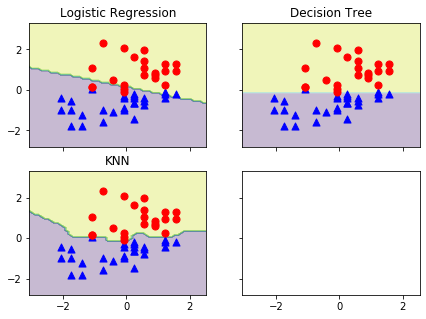

In [54]:
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
from itertools import product
x_min=X_train_std[:,0].min()-1
x_max=X_train_std[:,0].max()+1
y_min=X_train_std[:,1].min()-1
y_max=X_train_std[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
f,axarr=plt.subplots(nrows=2,ncols=2,sharex='col',sharey='row',figsize=(7,5))
for idx,clf,tt in zip(product([0,1],[0,1]),all_clf,clf_labels):
    clf.fit(X_train_std,y_train)
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    axarr[idx[0],idx[1]].contourf(xx,yy,z,alpha=0.3)
    axarr[idx[0],idx[1]].scatter(X_train_std[y_train==0,0],X_train_std[y_train==0,1],c='blue',marker='^',s=50)
    axarr[idx[0],idx[1]].scatter(X_train_std[y_train==1,0],X_train_std[y_train==1,1],c='red',marker='o',s=50)
    axarr[idx[0],idx[1]].set_title(tt)
plt.text(-3.5,-4.5,s='Sepal Width[standardized]',ha='center',va='center',fontsize=12)
plt.text(-10.5,-4.5,s='Petal length[standardized]',ha='center',va='center',fontsize=12,rotation=90)
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',feature_names=['petal length','petal width'])

In [55]:
from sklearn.model_selection import GridSearchCV
params={'decisiontreeclassifier_max_depth':[1,2],'pipeline-1__clf__C':[0.001,0.1,100.0]}
grid=GridSearchCV(estimator=mv_clf,param_grid=params,cv=10,scoring='roc_auc')
grid.fit(X_train,y_train)


TypeError: zip argument #2 must support iteration